In [2]:
from psaw import PushshiftAPI
from copy import deepcopy
import pandas as pd
import datetime as dt
from sklearn.utils import shuffle
import nltk
from matplotlib import pyplot as plt
api = PushshiftAPI()
start_epoch=int(dt.datetime(2017, 9, 11).timestamp())
end_epoch=int(dt.datetime(2017, 11, 12).timestamp())

In [3]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dmd9898\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
def createperiods(DF):
    DF["time_period"]=(DF["created_utc"]/86400)
    
    DF = DF.astype({"time_period": int})

In [5]:
def averagetable(DF):
    k = int(DF["time_period"].min())
    X = []
    Y = []
    while k<=int(DF["time_period"].max()):
        temp = []
        for i in range(0,len(DF["time_period"])):
            if int(DF["time_period"][i]) == k:
                temp.append(DF['SENTIMENT_VALUE'][i])
        if len(temp)> 0:
            X.append(k-DF["time_period"].min())
            Y.append(sum(temp)/len(temp))
        
        k+=1
    return X,Y

In [6]:
def createdataframe(DF):
    all_reviews = DF['body']
    all_sent_values = []
    all_sentiments = []
    for i in range(0,len(all_reviews)):
        all_sent_values.append(sentiment_value(all_reviews[i]))
    SENTIMENT_VALUE = []
    SENTIMENT = []
    for i in range(0,len(all_reviews)):
        sent = all_sent_values[i]
        if (sent<=1 and sent>=0.5):
            SENTIMENT.append('V.Positive')
            SENTIMENT_VALUE.append(5)
        elif (sent<0.5 and sent>0):
            SENTIMENT.append('Positive')
            SENTIMENT_VALUE.append(4)
        elif (sent==0):
            SENTIMENT.append('Neutral')
            SENTIMENT_VALUE.append(3)
        elif (sent<0 and sent>=-0.5):
            SENTIMENT.append('Negative')
            SENTIMENT_VALUE.append(2)
        else:
            SENTIMENT.append('V.Negative')
            SENTIMENT_VALUE.append(1)
    DF['SENTIMENT']= SENTIMENT
    DF['SENTIMENT_VALUE']= all_sent_values
def createChart1 (DF, label):
    DF.SENTIMENT.str.split('|', expand=True).stack().value_counts().plot(kind='pie', label=label, figsize=(12,12), autopct='%1.0f%%')
def createChart2(DF, label):    
    createperiods(DF)
    x, y = averagetable(DF)
    plt.plot(x, y, label = label)
    plt.legend(loc="upper left")
    

In [7]:
def stringreturn(q, r):
    title = q + ' in ' + 'r/' +r
    return title
def rungamut(DF, q, r):
    print('Searching Reddit...')
    work = api.search_comments(q = q, subreddit = r, after= start_epoch, before= end_epoch)
    print('Creating Data Frame...')
    DF = pd.DataFrame([obj.d_ for obj in work])
    print('Generating Chart Label...')
    label = stringreturn(q, r)
    print('Analyzing Data Frame...')
    createdataframe(DF)
    print('Making Charts...')
    createChart1 (DF, label)
    plt.show()
    print('Second Chart...')
    createChart2(DF, label)
    plt.show()
    return DF

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


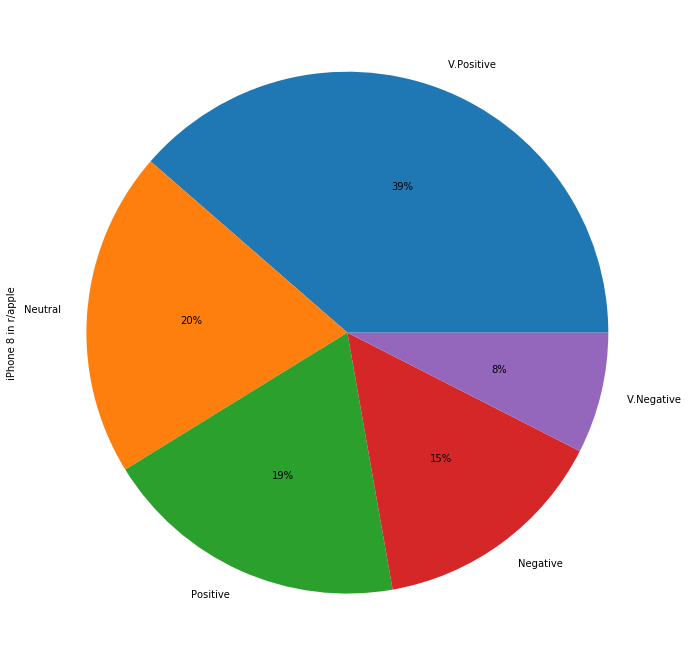

Second Chart...


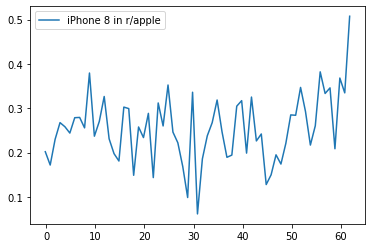

In [33]:
df1 = rungamut('df1', 'iPhone 8', 'apple')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


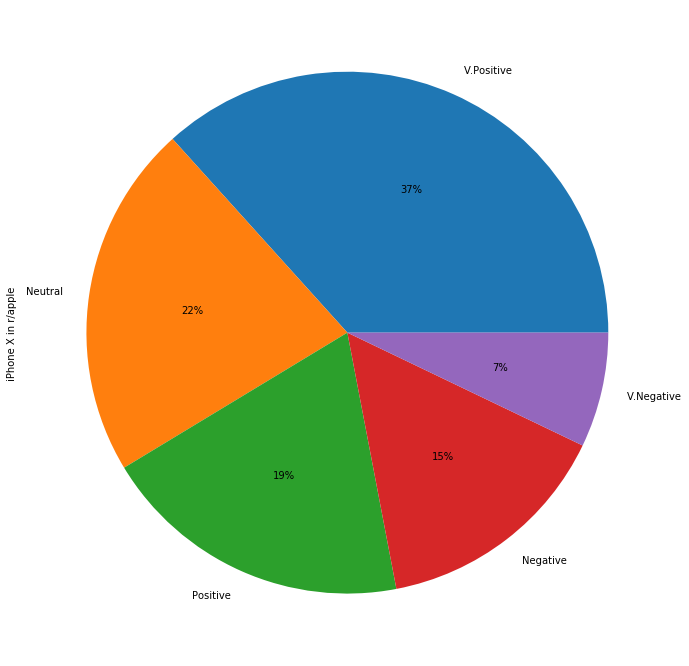

Second Chart...


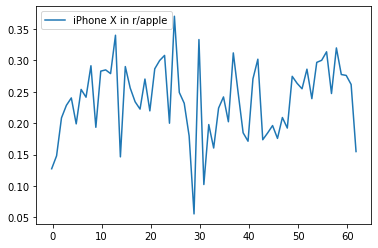

In [34]:
df2 = rungamut('df2', 'iPhone X', 'apple')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


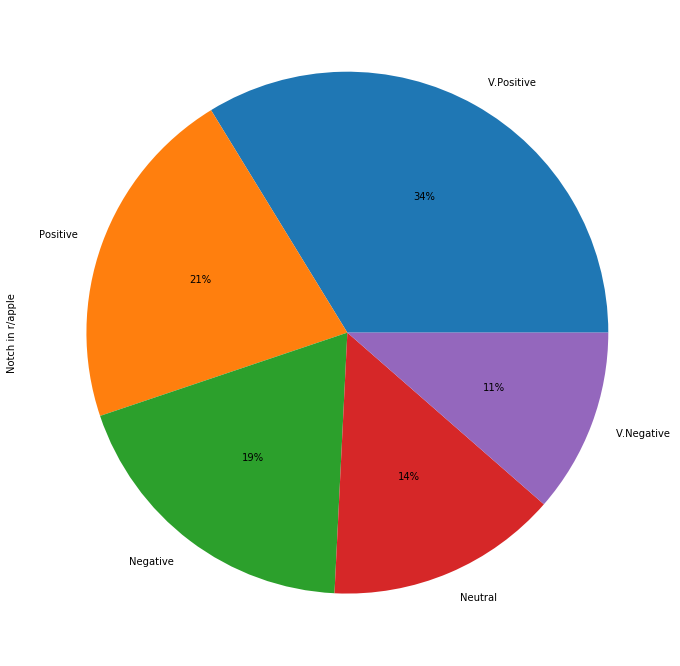

Second Chart...


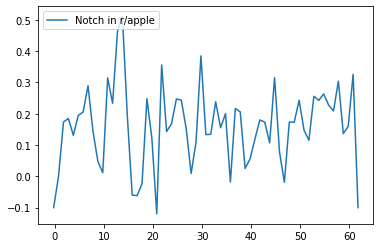

In [8]:
df3 = rungamut('df3', 'Notch', 'apple')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


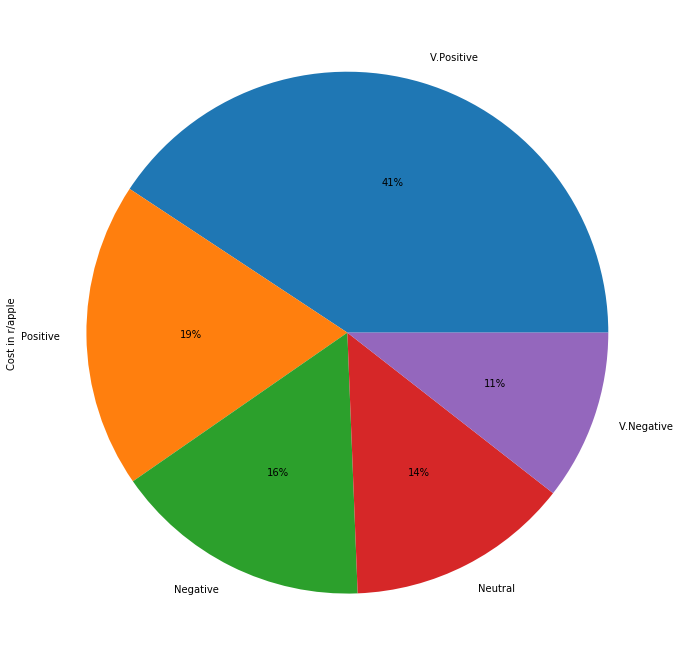

Second Chart...


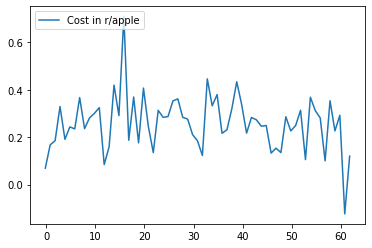

In [17]:
rungamut('df4', 'Cost', 'apple')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


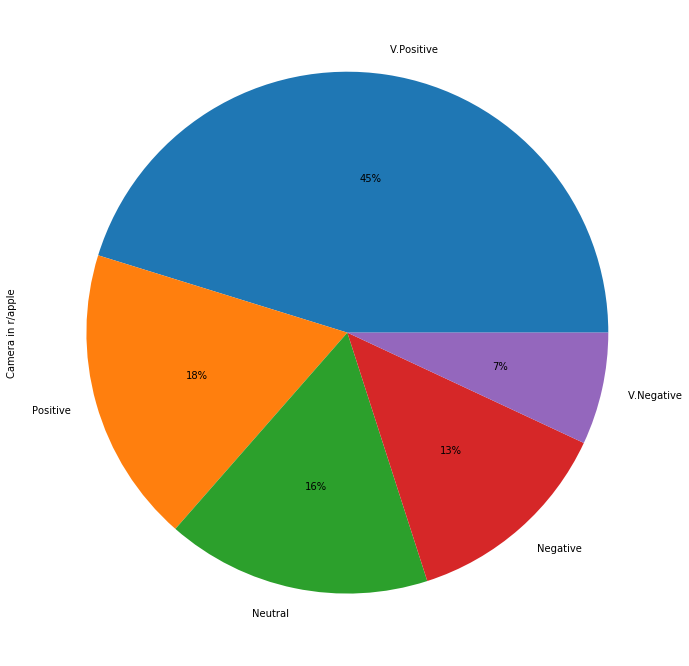

Second Chart...


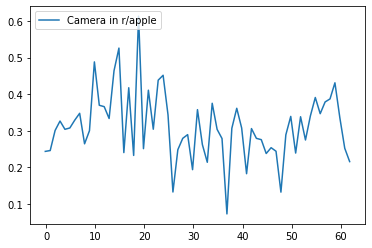

In [18]:
rungamut('df5', 'Camera', 'apple')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


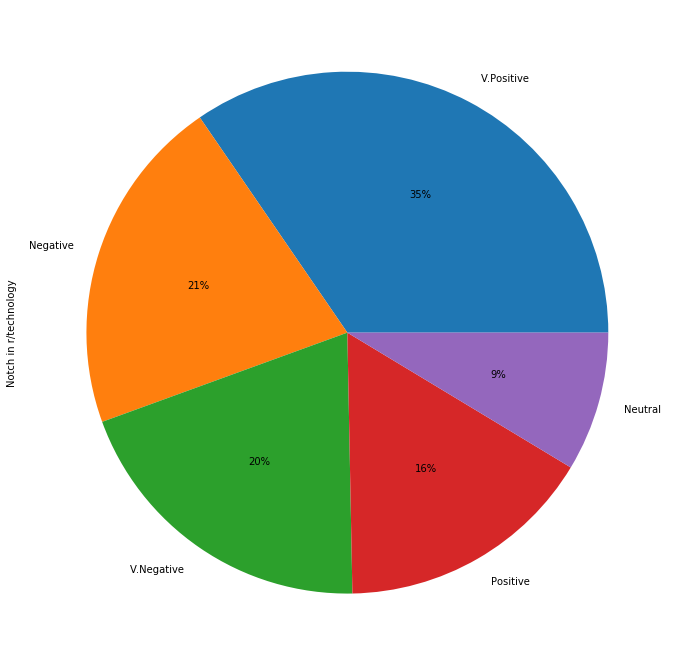

Second Chart...


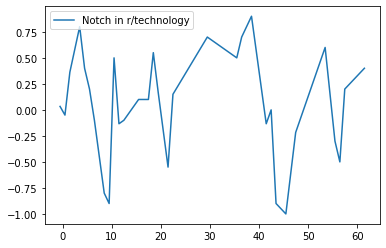

In [19]:
rungamut('df6', 'Notch', 'technology')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


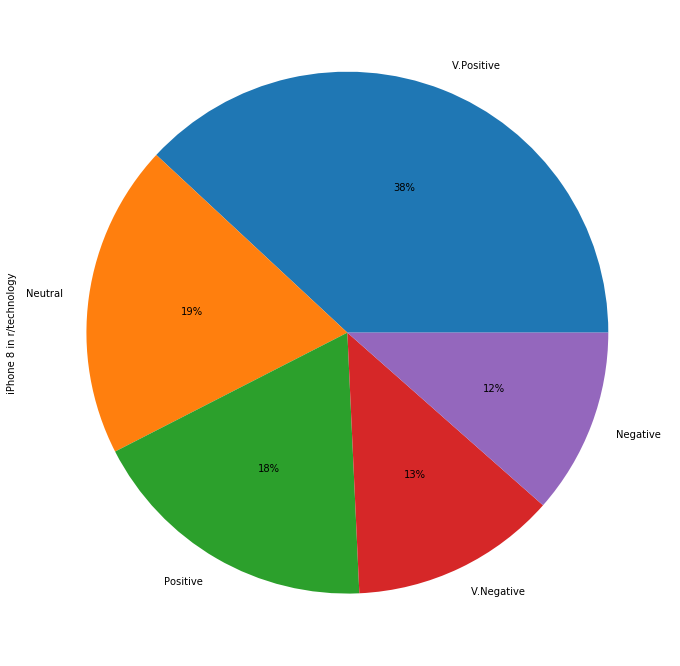

Second Chart...


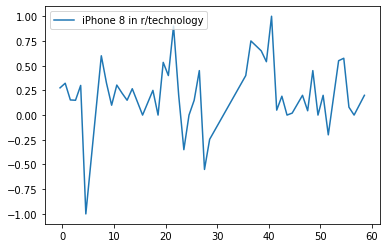

In [20]:
rungamut('df7', 'iPhone 8', 'technology')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


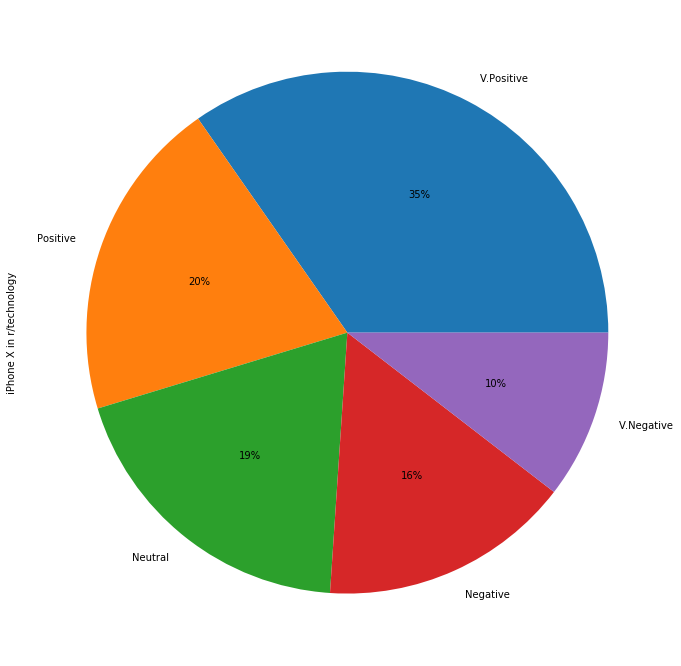

Second Chart...


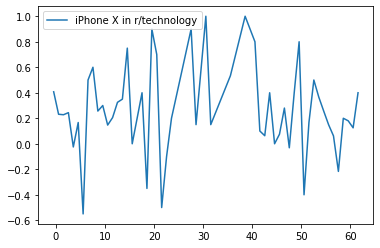

In [21]:
rungamut('df8', 'iPhone X', 'technology')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


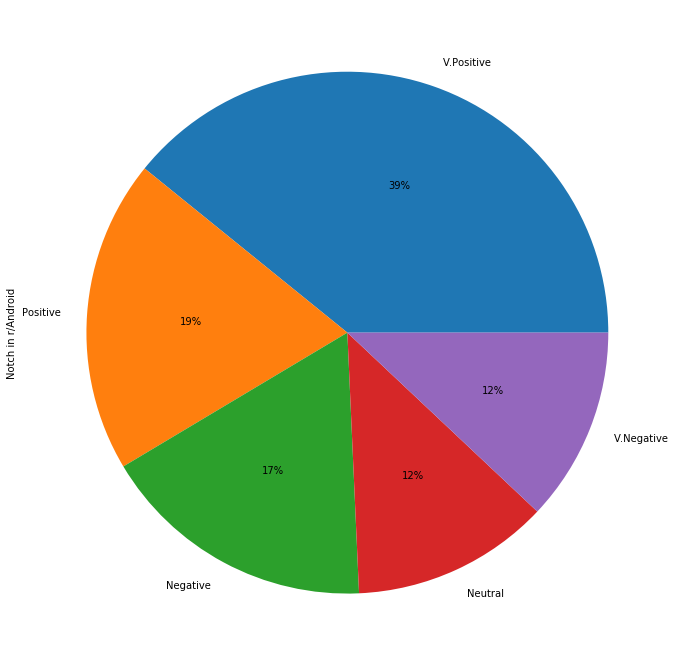

Second Chart...


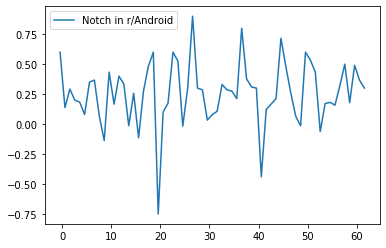

In [22]:
rungamut('df9', 'Notch', 'Android')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


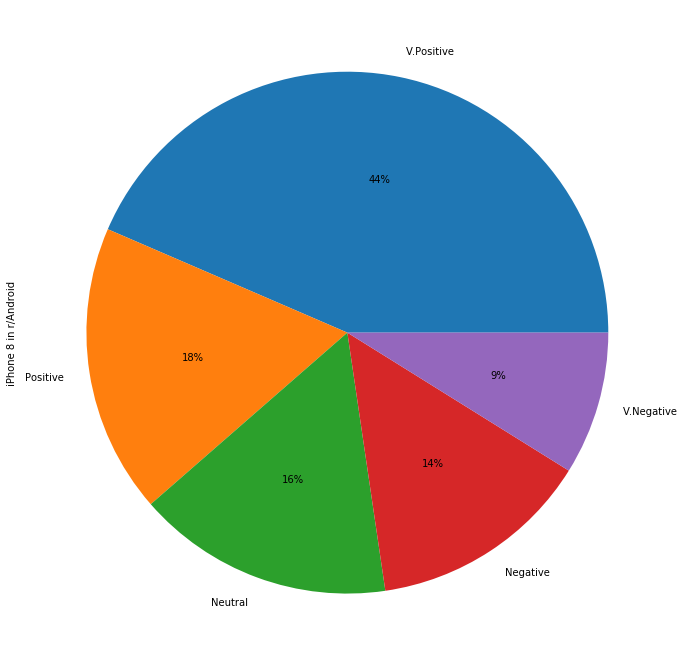

Second Chart...


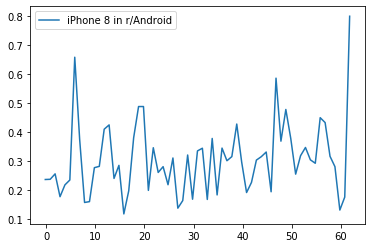

In [23]:
rungamut('df10', 'iPhone 8', 'Android')

Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


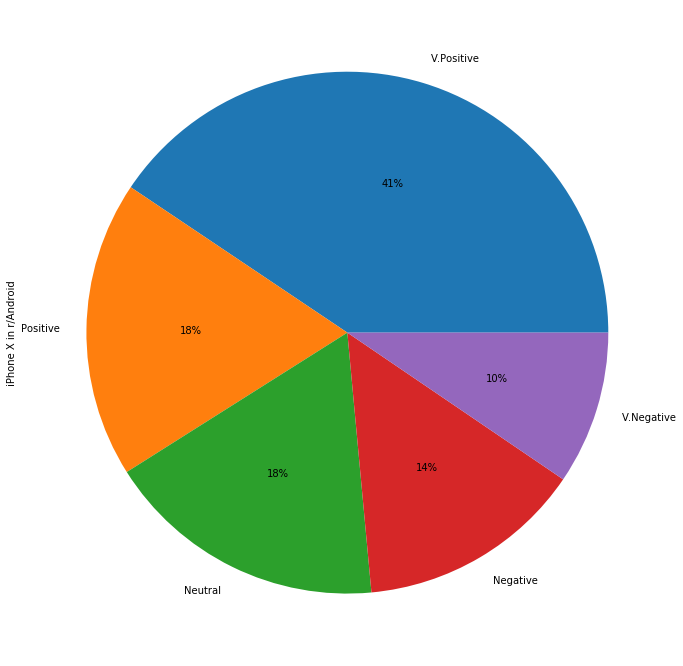

Second Chart...


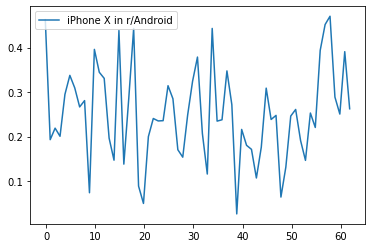

In [24]:
rungamut('df11', 'iPhone X', 'Android')

In [43]:
sample = df2['body'][1240]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Agreed. We actually made an iPhone X-like simulator for testing our app layout and we still have to do a bunch of adjustments for our app that launched day 1 for iPhone X (Halide). It's not that easy, OP. 
Sentiment: 
0.1


Searching Reddit...
Creating Data Frame...
Generating Chart Label...
Analyzing Data Frame...
Making Charts...


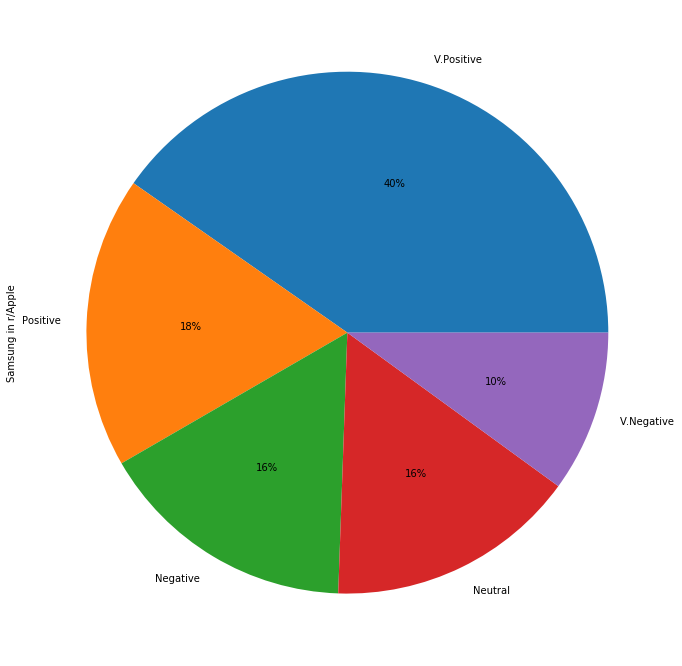

Second Chart...


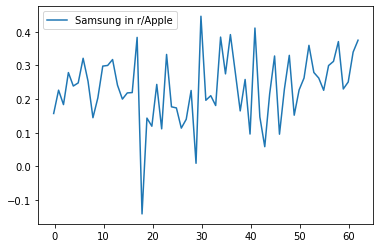

If I recall correctly, from what Samsung said a long time ago when they switched from RGB to PenTile, they said that they had serious issues with the overall life of the display and blue subpixels when they kept it in RGB. This is what made them switch to PenTile. 
Sentiment: 
-0.1


In [44]:
df12 = rungamut('df12', 'Samsung', 'Apple')
sample = df12['body'][1240]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

In [48]:
sample = df12['body'][1]
sampleauth = df12['author'][1]
print(sample, '  -' ,sampleauth)
print('Sentiment: ', )
print(sentiment_value(sample))

You know what’s funny? When Android users gloat about how superior OLED is for years, when it obviously has issues even today. What a load of crap.

I️ love the display on my iPhone X, but the viewing angles is inferior to LCD. OLED is NOT the perfect display technology no matter what Samsung fanboys say.    - MrX8503
Sentiment: 
-0.7
